# 5. Analisi di un dataset di video giochi
1. Quanti videogiochi sono stati pubblicati
2. Quali sono i generi più popolari? Mostralo con un bar plot
3. Plotta l'evoluzione del numero di giochi pubblicati nel tempo
4. Prova a riprodurre questo plot 
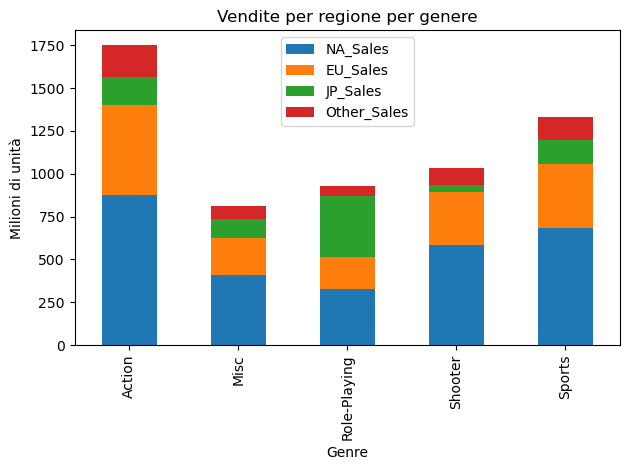


Numero totale di videogiochi pubblicati: 16598

Numero di giochi per genere:
Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: count, dtype: int64


C:\Users\sanic\AppData\Local\Temp\ipykernel_21100\1427523757.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Genre', order=genre_counts.index, palette='Set2')


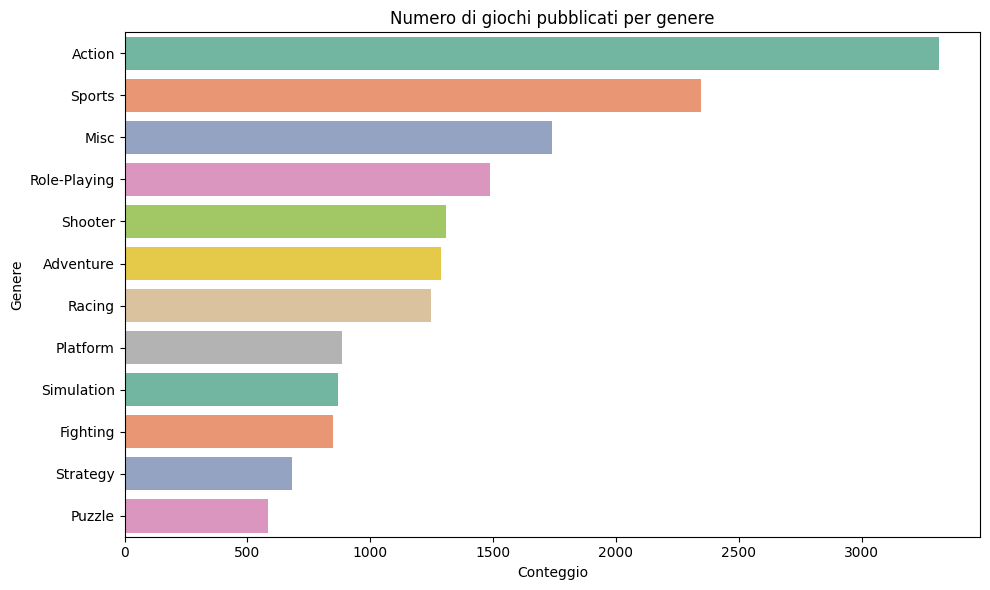

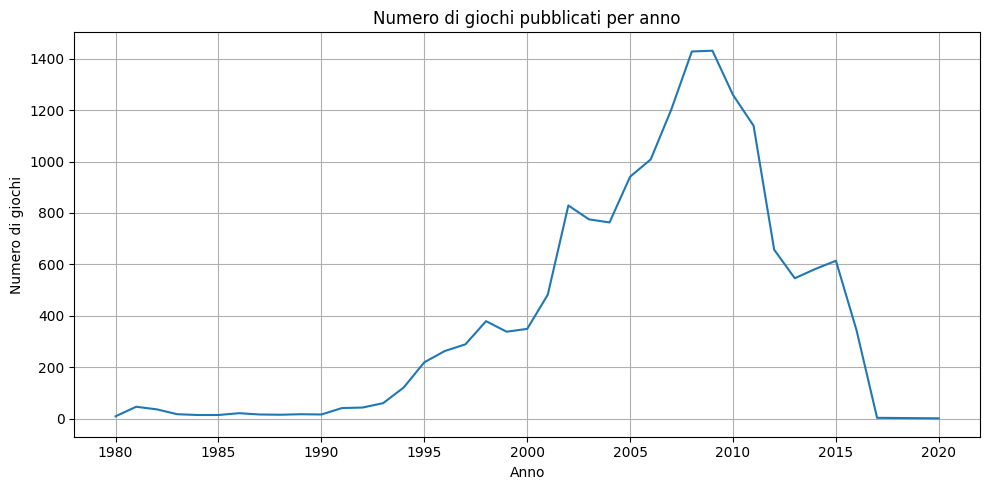

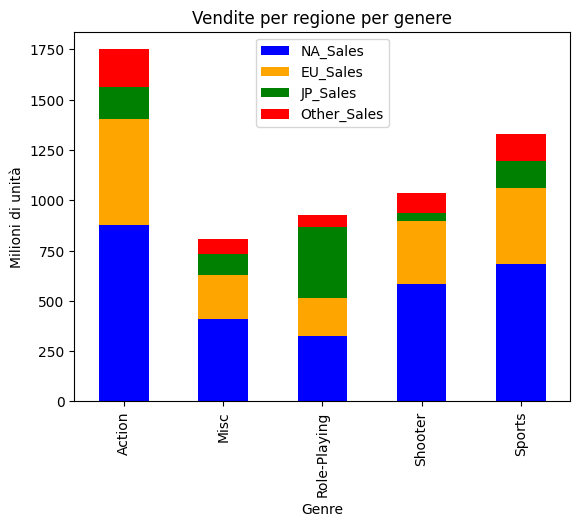

In [3]:
# Import dei pacchetti
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Caricamento del dataset
url = 'https://zenodo.org/record/5898311/files/vgsales.csv'
df = pd.read_csv(url)
df.head()

# 1. Quanti videogiochi sono stati pubblicati?
print("Numero totale di videogiochi pubblicati:", len(df))

# 2. Generi più popolari (numero di giochi per genere)
genre_counts = df['Genre'].value_counts()
print("\nNumero di giochi per genere:")
print(genre_counts)
# Bar plot dei generi più popolari
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Genre', order=genre_counts.index, palette='Set2')
plt.title("Numero di giochi pubblicati per genere")
plt.xlabel("Conteggio")
plt.ylabel("Genere")
plt.tight_layout()
plt.show()

# 3. Evoluzione del numero di giochi pubblicati nel tempo
games_per_year = df['Year'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x=games_per_year.index, y=games_per_year.values)
plt.title("Numero di giochi pubblicati per anno")
plt.xlabel("Anno")
plt.ylabel("Numero di giochi")
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Riproduzione del plot: vendite per regione per genere
vendite_per_regione = df.groupby('Genre')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
ordine = ['Action', 'Misc',  'Role-Playing', 'Shooter', 'Sports']
vendite_per_regione = vendite_per_regione.loc[ordine]

vendite_per_regione.plot(kind='bar', stacked=True, color=['blue','orange','green','red'])

plt.title('Vendite per regione per genere')
plt.xlabel('Genre')
plt.ylabel('Milioni di unità')
plt.legend(['NA_Sales','EU_Sales','JP_Sales','Other_Sales'], loc = 'upper center')
plt.show()